# Aviation Accident Risk Analysis

## Introduction

Our business is growing into the aviation sector with the goal of buying and running aircraft for both individual and commercial businesses. However, the company's objective is to identify low-risk aircraft models because the aviation business poses serious safety threats.

We need to identify the aircraft types with the lowest accident rates and severity levels in order to reduce risk and increase safety. This analysis will provide insights into accident trends, key risk factors, and aircraft safety records. 

## Data Understanding

#### Data Source and why it is suitable for the project.
  
The data is from the National Transportation Safety Board(NTSB) and has aviation data from the year 1962 to 2023. This data is suitable for the project since it provides detailed history of aviation accidents as well as their causes. It will allow the business make data-driven decisons when selecting the suitable aircraft for purchase.

#### Descriptive statistics of the data

Descrptive analysis of the data will be performed using **.describe()** method to summarize key statistics. This will help reveal things such as the mean number of injuries per accidents as well as the variance to show the severity differences among aircraft models, makes and categories.

#### Justification of the inclusion of features based on their properties and relevance for the project
  
The features Aircraft model, aircraft make and category are important for identifying low-risk aircraft. 

*1. Aircraft model: Helps determine historically safer aircraft models by showing specific types of aircraft with their recorded injuries.*

*2. Aircraft category: Helps determine categories that are more prone to accidents by classifying aircrafts based on their use(eg. commercial, personal).*

*3. Aircraft make: Helps the business to assess brands that produce more reliable aircraft.*

#### Limitations of the data that have implications for the project

1. The dataset does not include external influences like pilot experience or maintenance records, which also affect aviation safety.
2. Potential data gaps such as missing values in some fields.


# Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

**Loading States code data into a pandas dataframe & exploring the top 5 rows.**

  ***.head()*** helps get the first 5 rows

In [2]:
states_df = pd.read_csv("USState_Codes.csv")
states_df.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


**Loading *aviation data* and exploring the top 5 rows.**
  
Using *encoding="ISO-8859-1"* since the data has special characters that may not be readable using the default UTF-8 encoding, and *low_memory=False* since some of the columns have mixed data types.

In [3]:
aviation_df = pd.read_csv("AviationData.csv", encoding="ISO-8859-1", low_memory=False)
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


**Getting the summary of the DataFrame to understand it's structure using .info()**

In [4]:
aviation_df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [5]:
aviation_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

**Checking for the statistical information in the data**

In [6]:
aviation_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


**Checking for duplicates in the data**

In [7]:
aviation_df.duplicated().value_counts()

False    88889
Name: count, dtype: int64

**Checking for null values**

In [8]:
aviation_df.isna().sum().sort_values(ascending=False)

Schedule                  76307
Air.carrier               72241
FAR.Description           56866
Aircraft.Category         56602
Longitude                 54516
Latitude                  54507
Airport.Code              38757
Airport.Name              36185
Broad.phase.of.flight     27165
Publication.Date          13771
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7096
Report.Status              6384
Purpose.of.flight          6192
Number.of.Engines          6084
Total.Uninjured            5912
Weather.Condition          4492
Aircraft.damage            3194
Registration.Number        1382
Injury.Severity            1000
Country                     226
Amateur.Built               102
Model                        92
Make                         63
Location                     52
Investigation.Type            0
Event.Date                    0
Accident.Number               0
Event.Id                      0
dtype: i

In [9]:
aviation_df.isna().mean().sort_values(ascending=False)

Schedule                  0.858453
Air.carrier               0.812710
FAR.Description           0.639742
Aircraft.Category         0.636772
Longitude                 0.613304
Latitude                  0.613203
Airport.Code              0.436016
Airport.Name              0.407081
Broad.phase.of.flight     0.305606
Publication.Date          0.154924
Total.Serious.Injuries    0.140737
Total.Minor.Injuries      0.134246
Total.Fatal.Injuries      0.128261
Engine.Type               0.079830
Report.Status             0.071820
Purpose.of.flight         0.069660
Number.of.Engines         0.068445
Total.Uninjured           0.066510
Weather.Condition         0.050535
Aircraft.damage           0.035932
Registration.Number       0.015547
Injury.Severity           0.011250
Country                   0.002542
Amateur.Built             0.001147
Model                     0.001035
Make                      0.000709
Location                  0.000585
Investigation.Type        0.000000
Event.Date          

**Filling the null values in the Aircraft.Category and Purpose.of.flight column with 'Unknown'.**

In [10]:
aviation_df['Aircraft.Category'] = aviation_df['Aircraft.Category'].fillna('Unknown')
aviation_df['Purpose.of.flight'] = aviation_df['Purpose.of.flight'].fillna('Unknown')

**Printing unique values in the given columns**

In [11]:
for col in ['Investigation.Type', 'Aircraft.damage', 'Aircraft.Category', 'Make', 'Model', 'Amateur.Built', 'Engine.Type', 'Purpose.of.flight']:
    print(f"\nUnique values in '{col}':")
    print(aviation_df[col].unique())


Unique values in 'Investigation.Type':
['Accident' 'Incident']

Unique values in 'Aircraft.damage':
['Destroyed' 'Substantial' 'Minor' nan 'Unknown']

Unique values in 'Aircraft.Category':
['Unknown' 'Airplane' 'Helicopter' 'Glider' 'Balloon' 'Gyrocraft'
 'Ultralight' 'Blimp' 'Powered-Lift' 'Weight-Shift' 'Powered Parachute'
 'Rocket' 'WSFT' 'UNK' 'ULTR']

Unique values in 'Make':
['Stinson' 'Piper' 'Cessna' ... 'JAMES R DERNOVSEK' 'ORLICAN S R O'
 'ROYSE RALPH L']

Unique values in 'Model':
['108-3' 'PA24-180' '172M' ... 'ROTORWAY EXEC 162-F' 'KITFOX S5'
 'M-8 EAGLE']

Unique values in 'Amateur.Built':
['No' 'Yes' nan]

Unique values in 'Engine.Type':
['Reciprocating' nan 'Turbo Fan' 'Turbo Shaft' 'Unknown' 'Turbo Prop'
 'Turbo Jet' 'Electric' 'Hybrid Rocket' 'Geared Turbofan' 'LR' 'NONE'
 'UNK']

Unique values in 'Purpose.of.flight':
['Personal' 'Unknown' 'Business' 'Instructional' 'Ferry'
 'Executive/corporate' 'Aerial Observation' 'Aerial Application'
 'Public Aircraft' 'Skydiving

Dropping some of the columns with null values since they are not being used in this analysis

In [12]:
aviation_df.drop(columns=['Latitude','Longitude','Air.carrier','Schedule','Airport.Name','Airport.Code','FAR.Description','Air.carrier'], inplace=True)

**Filling null values using .fillna(), to fill the null numeric columns with 0**

In [13]:
aviation_df['Total.Fatal.Injuries'] = aviation_df['Total.Fatal.Injuries'].fillna(0)

In [14]:
aviation_df['Total.Serious.Injuries'] = aviation_df['Total.Serious.Injuries'].fillna(0)

In [15]:
aviation_df['Total.Minor.Injuries'] = aviation_df['Total.Minor.Injuries'].fillna(0)

In [16]:
aviation_df['Total.Uninjured'] = aviation_df['Total.Uninjured'].fillna(0)

**Creating a column Total.injuries to get the total number of injuries row-wise**

In [17]:
aviation_df['Total.Injuries'] = aviation_df[
    ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']
].sum(axis=1)

In [18]:
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Total.Injuries
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Unknown,NC6404,...,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,2.0
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Unknown,N5069P,...,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,4.0
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Unknown,N5142R,...,Personal,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,26-02-2007,3.0
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Unknown,N1168J,...,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,2.0
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Unknown,N15NY,...,Personal,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980,3.0


**Getting statistical information on the column Total.Injuries**

In [19]:
aviation_df['Total.Injuries'].describe()

count    88889.000000
mean         1.114379
std          6.027319
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        380.000000
Name: Total.Injuries, dtype: float64

Converting the *Make* column to titlecase since some makes (eg. Cessna, CESSNA) are in lower case and others in uppercase, causing inconsistency

In [20]:
aviation_df['Make'] = aviation_df['Make'].str.title()

Converting the 'Event.Date' column to a DateTime format

In [21]:
aviation_df['Event.Date'] = pd.to_datetime(aviation_df['Event.Date'])

# Data Analysis and Visualization

Looking at the trend of number of injuries per year

In [22]:
aviation_df['Year'] = aviation_df['Event.Date'].dt.year
print(aviation_df.shape)
aviation_df.head()

(88889, 26)


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Total.Injuries,Year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Unknown,NC6404,...,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,2.0,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Unknown,N5069P,...,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,4.0,1962
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Unknown,N5142R,...,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,26-02-2007,3.0,1974
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Unknown,N1168J,...,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,2.0,1977
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Unknown,N15NY,...,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980,3.0,1979


In [23]:
annual_injuries = aviation_df.groupby('Year')['Total.Injuries'].sum().reset_index()
annual_injuries

,Year,Total.Injuries
0,1948,2.0
1,1962,4.0
2,1974,3.0
3,1977,2.0
4,1979,4.0
5,1981,4.0
6,1982,3310.0
7,1983,2994.0
8,1984,2973.0
9,1985,3368.0


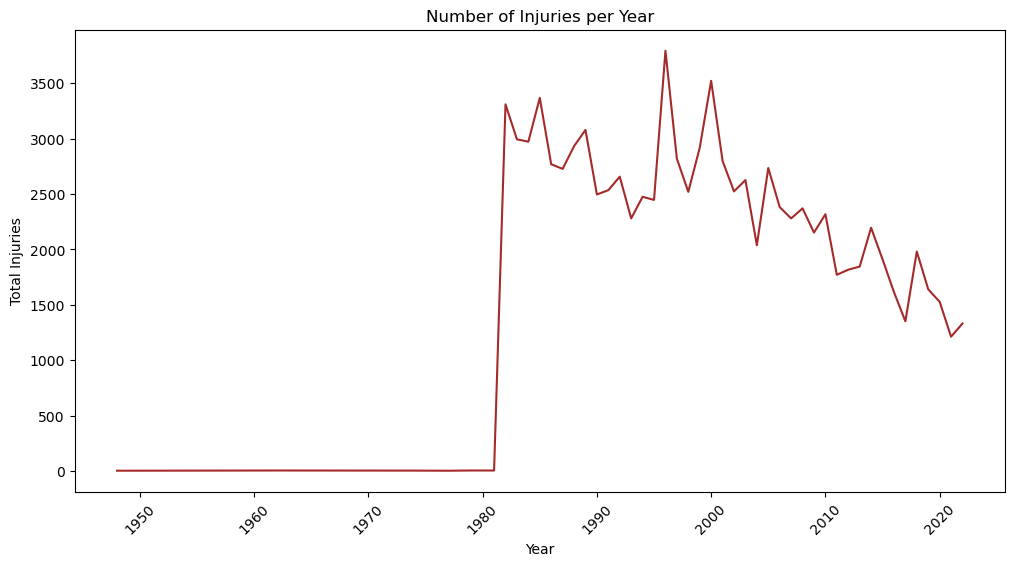

In [24]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)
sns.lineplot(x=annual_injuries['Year'], y=annual_injuries['Total.Injuries'], color='brown')
plt.xlabel('Year')
plt.ylabel('Total Injuries')
plt.title('Number of Injuries per Year')
plt.savefig("injury_trends_overtime.png", dpi=300, bbox_inches='tight')
plt.show()

From the figure above, it is evident that there were few injuries upto the year 1981, where we see a rise in injuries in 1982. There was a gradual drop until 1996 were there is a spike with 3794 injuries. There after, we see a decrease in the number of injuries which can be attributed to measures put in place to curb accidents.

**Looking into Makes and Models with the most injuries**

In [25]:
injuries_by_model_and_make = aviation_df.groupby(['Make','Model'])['Total.Injuries'].sum().nlargest(20).reset_index()
injuries_by_model_and_make

,Make,Model,Total.Injuries
0,Boeing,737,1827.0
1,Cessna,172,1100.0
2,Boeing,737-200,1064.0
3,Cessna,152,1013.0
4,Piper,PA-28-140,996.0
5,Cessna,172N,975.0
6,Piper,PA-28-181,676.0
7,Cessna,172M,662.0
8,Bell,206B,629.0
9,Piper,PA-28-180,607.0


The above aircrafts grouped by make and model have the most number of injuries.

**Looking into Makes and Models with the least injuries**

In [26]:
injuries_by_model_and_make = aviation_df.groupby(['Make','Model'])['Total.Injuries'].sum().nsmallest(20).reset_index()
injuries_by_model_and_make

,Make,Model,Total.Injuries
0,2007 Savage Air Llc,EPIC LT,0.0
1,2021Fx3 Llc,CCX-2000,0.0
2,67 Flying Dutchman,D1/LFD-13,0.0
3,737,800,0.0
4,777,FF2,0.0
5,A. H. Gettings,GLASSAIR SH2,0.0
6,Aaa Aircraft Llc,CCX-2000,0.0
7,Aardema Robert John,1 AARDEMA RAG WNG SP,0.0
8,Ab Sportine Aviacija,LAK 17,0.0
9,Abbott,GYROPLANE,0.0


The above aircrafts grouped by make and model are the safest since they do not have any registered injuries

### Category deepdive

In this section, we will explore the categories and try to understand at the category level, which ones are safer and which ones are not.
***We acknowledge that we have a lot of missing data (Unknown) here, but we believe that it's an important feature to look at***

In [27]:
categories_df = aviation_df[aviation_df['Aircraft.Category'] != 'Unknown']

In [28]:
injuries_by_category = categories_df.groupby('Aircraft.Category')['Total.Injuries'].sum().sort_values(ascending=False).reset_index()
injuries_by_category

,Aircraft.Category,Total.Injuries
0,Airplane,29577.0
1,Helicopter,3710.0
2,Balloon,414.0
3,Glider,324.0
4,Weight-Shift,175.0
5,Gyrocraft,129.0
6,Powered Parachute,128.0
7,Ultralight,29.0
8,WSFT,13.0
9,Blimp,3.0


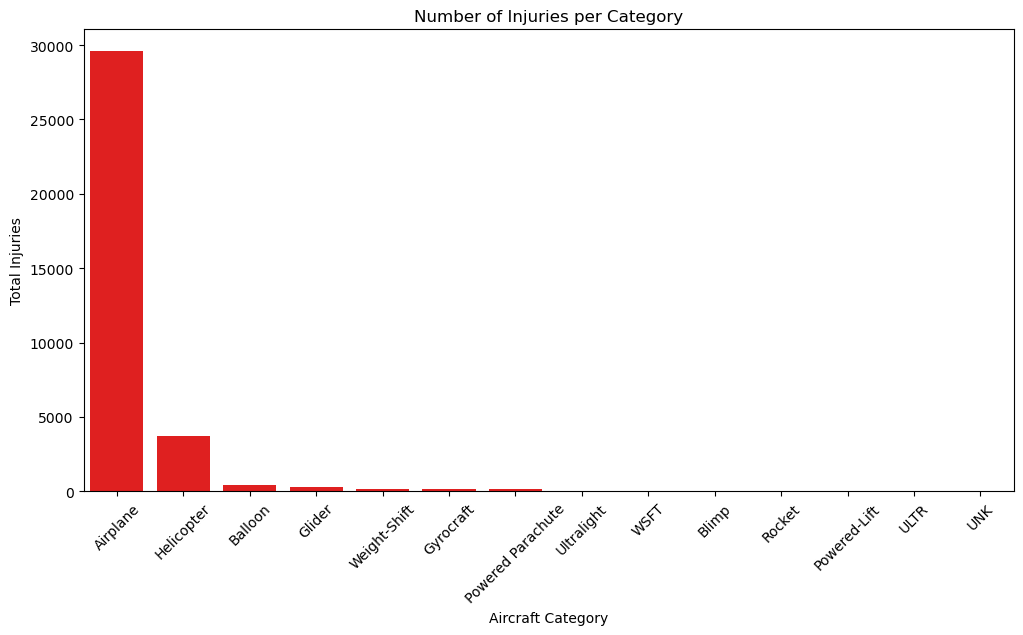

In [29]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)
sns.barplot(x=injuries_by_category['Aircraft.Category'], y=injuries_by_category['Total.Injuries'], color='red')
plt.xlabel('Aircraft Category')
plt.ylabel('Total Injuries')
plt.title('Number of Injuries per Category')
plt.savefig("injury_per_category.png", dpi=300, bbox_inches='tight')
plt.show()

From the above, we see that **Airplane and Helicopter** are leading interms of total number of Injuries. Categories such powered-lift and Blimp have almost zero registered injuries.

In [30]:
def clean_text(text):
    """Removes non-printable characters from text."""
    if isinstance(text, str):
        return ''.join(char for char in text if char.isprintable())
    return text  

aviation_df = aviation_df.applymap(clean_text)
aviation_df.shape

(88889, 26)

### Make deepdive

In this section, we will explore more of the different makes with the largest number of injuries

In [31]:
injuries_airplane_and_helicopter = aviation_df.groupby(['Make'])['Total.Injuries'].sum().nlargest(20).reset_index()
injuries_airplane_and_helicopter

,Make,Total.Injuries
0,Cessna,21411.0
1,Boeing,13666.0
2,Piper,13505.0
3,Beech,6220.0
4,Mcdonnell Douglas,3347.0
5,Bell,3332.0
6,Airbus Industrie,1711.0
7,Airbus,1623.0
8,Douglas,1336.0
9,Mooney,1324.0


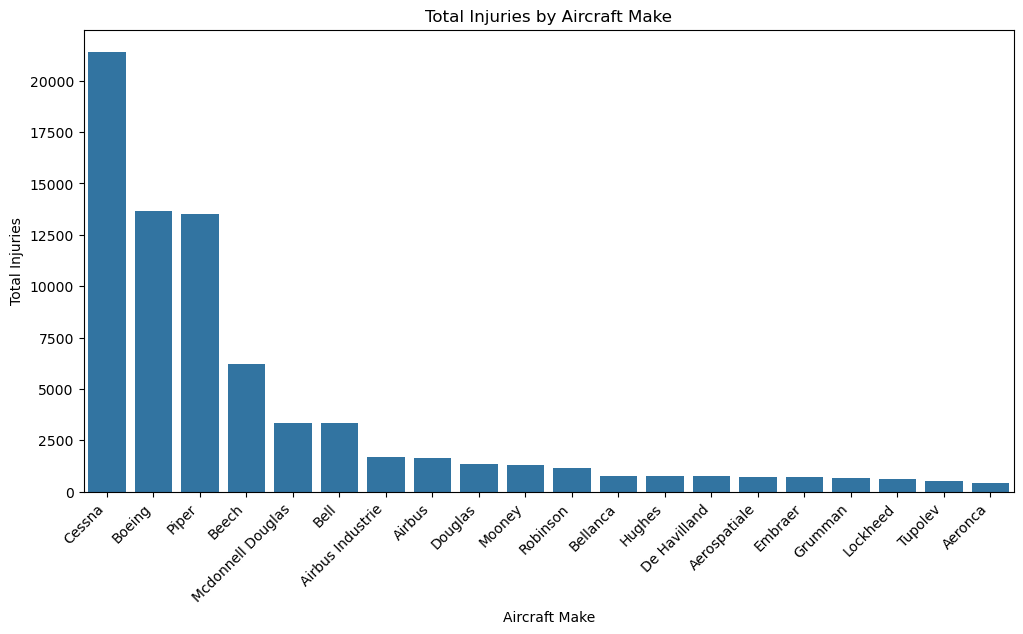

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(data=injuries_airplane_and_helicopter ,x='Make', y='Total.Injuries')
plt.xticks(rotation=45, ha="right") 
plt.xlabel('Aircraft Make')
plt.ylabel('Total Injuries')
plt.title('Total Injuries by Aircraft Make')
plt.savefig("injury_per_make.png", dpi=300, bbox_inches='tight')
plt.show()

From the visualization above, Cessna, Boeing and Piper have a high number of total injuries. 

#### Model deepdive

In this section, we are exploring the models with the most number of injuries.

In [33]:
make_model = aviation_df.groupby(['Make', 'Model'])['Total.Injuries'].sum().nlargest(20).reset_index()
make_model

,Make,Model,Total.Injuries
0,Boeing,737,1827.0
1,Cessna,172,1100.0
2,Boeing,737-200,1064.0
3,Cessna,152,1013.0
4,Piper,PA-28-140,996.0
5,Cessna,172N,975.0
6,Piper,PA-28-181,676.0
7,Cessna,172M,662.0
8,Bell,206B,629.0
9,Piper,PA-28-180,607.0


In [34]:
aviation_df["Make-Model"] = aviation_df["Make"] + "-" + aviation_df["Model"]

In [35]:
make_with_model = aviation_df.groupby(['Make-Model'])['Total.Injuries'].sum().nlargest(25).reset_index()
make_with_model

,Make-Model,Total.Injuries
0,Boeing-737,1827.0
1,Cessna-172,1100.0
2,Boeing-737-200,1064.0
3,Cessna-152,1013.0
4,Piper-PA-28-140,996.0
5,Cessna-172N,975.0
6,Piper-PA-28-181,676.0
7,Cessna-172M,662.0
8,Bell-206B,629.0
9,Piper-PA-28-180,607.0


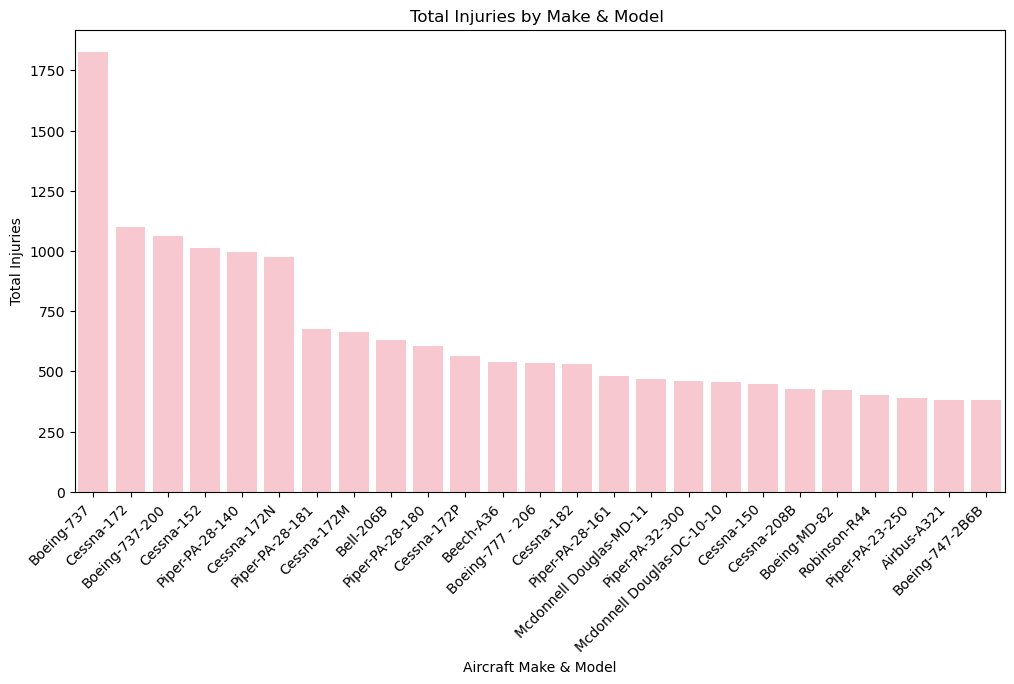

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(data=make_with_model ,x='Make-Model', y='Total.Injuries', color='pink')
plt.xticks(rotation=45, ha="right") 
plt.xlabel('Aircraft Make & Model')
plt.ylabel('Total Injuries')
plt.title('Total Injuries by Make & Model ')
plt.savefig("injuries_by_make_model.png", dpi=300, bbox_inches='tight')
plt.show()

From this figure, Boeing 737 has the highest number of injuries, followed by Cessna172. Boeing 777-206, Airbus-A321 are also among the top leading models in-terms of injuries.

#### Exporting cleaned data to excel for use in the Tableau public dashboard

In [ ]:
aviation_df.to_excel("cleaned_data.xlsx", index=False)

# Conclusion

#### **Findings and Recommendations for the Business**  

##### **Finding 1: Injuries have significantlly decreased over Time**
It is evident that there were few injuries upto the year 1981, where we see a rise in injuries in 1982. There was a gradual drop until 1996 were there is a spike with 3794 injuries. There after, we see a decrease in the number of injuries which can be attributed to measures put in place to curb accidents.

**Recommendation:** The company should have pilot training programs, aircraft maintenance training as well as choose aircrafts with established safety procedures.

##### **Finding 2: Aircraft Category Plays a Major Role in Safety**  
According to the Total Injuries by Aircraft Category research, powered-lift aircraft, gliders, and balloons have substantially less injuries than airplanes and helicopters.
The high number of injuries in airplanes is likely due to their widespread commercial use rather than inherent design risks.

**Recommendation**: Investing in smaller aircraft types like powered-lift, ultralights, or gliders may lower risk if the organization places a higher priority on safety than operational scale. Selecting models with improved safety records, cutting-edge safety measures, and reduced accident rates is essential if large commercial aircraft are needed.

##### **Finding 3: Aircraft Make Influences Safety Performance**  
According to the Total Injuries by Aircraft Make analysis, the most injuries have been reported by Cessna, Piper, and Boeing. This does not necessarily imply that certain brands are dangerous; it can be because of their larger fleet and more utilization.
Manufacturers like Mulholland, Curtiss-Wright, and MKII Corporation, on the other hand, had no documented injuries, indicating excellent safety performance or little exposure to operating risks.

**Recommendation**:
The company should focus on aircraft manufacturers with strong safety records and lower historical injury counts. Conducting further research on accident rates per flight hour will provide deeper insights before making purchasing decisions.


#### **Conclusion:**  
In conclusion, this study offers important insights into aviation safety by utilizing data analysis and visualization approaches. The company's aircraft buying strategy will be directly informed by the findings, guaranteeing a sustainable and low-risk entry into the aviation industry. The business can reduce operational costs by concentrating on safer aircraft categories, picking manufacturers with a solid safety record, and selecting aircraft models with low injury counts.